## Downloading Packages

In [ ]:
!pip install geopandas
!pip install mapclassify

## Importing Packages

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

## Importing Dataset

In [ ]:
listing = gpd.read_file('listings-2.csv')

# Making sure no data other then Chicago info is present
listing = listing[listing.neighbourhood == 'Chicago, Illinois, United States']
listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,2384,https://www.airbnb.com/rooms/2384,20210419135634,2021-04-22,"Hyde Park - Walk to UChicago, 10 min to McCormick",Visiting The University of Chicago or attendin...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/acf6b3c0-47f2...,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,"Chicago, Illinois, United States",My 2 bdrm apartment is a 2nd floor walk-up in ...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/8bb47...,https://a0.muscache.com/im/pictures/user/8bb47...,Hyde Park,1,1,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Chicago, Illinois, United States",Hyde Park,,41.7879,-87.5878,Private room in condominium,Private room,1,,1 shared bath,1,1,"[""Smoke alarm"", ""Extra pillows and blankets"", ...",$65.00,2,90,3,3,1125,1125,3.0,1125.0,,t,0,0,0,0,2021-04-22,182,4,1,2015-01-09,2021-03-28,100,10,10,10,10,10,10,R17000015609,f,1,0,1,0,2.38,None
2,7126,https://www.airbnb.com/rooms/7126,20210419135634,2021-04-23,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhoo...,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,https://www.airbnb.com/users/show/17928,Sarah,2009-05-19,"Chicago, Illinois, United States",We live in Chicago. We love to travel and see ...,within an hour,100%,95%,t,https://a0.muscache.com/im/users/17928/profile...,https://a0.muscache.com/im/users/17928/profile...,Ukrainian Village,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Chicago, Illinois, United States",West Town,,41.90166,-87.68021,Entire apartment,Entire home/apt,2,,1 bath,1,1,"[""Coffee maker"", ""Cooking basics"", ""Dishes and...",$65.00,2,60,2,2,1125,1125,2.0,1125.0,,t,11,11,11,267,2021-04-23,394,10,3,2009-07-03,2021-04-11,93,10,9,10,10,10,10,R18000034991,f,1,1,0,0,2.74,None
3,9811,https://www.airbnb.com/rooms/9811,20210419135634,2021-04-21,Barbara's Hideaway - Old Town,One-bedroom hideaway tucked into Old Town step...,Chicago’s Old Town neighborhood is squeezed be...,https://a0.muscache.com/pictures/37df1935-855c...,33004,https://www.airbnb.com/users/show/33004,At Home Inn,2009-08-21,"Chicago, Illinois, United States","Hi, we're Bob and Liz Biddle, long time Chicag...",within an hour,100%,94%,t,https://a0.muscache.com/im/pictures/user/e23d4...,https://a0.muscache.com/im/pictures/user/e23d4...,Old Town,10,10,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Chicago, Illinois, United States",Lincoln Park,,41.91943,-87.63898,Entire apartment,Entire home/apt,4,,1 bath,1,2,"[""Smoke alarm"", ""Cable TV"", ""Dedicated workspa...",$120.00,5,180,5,5,180,180,5.0,180.0,,

In [ ]:
# Getting necessary features
data = listing[["host_id", "host_name", "neighbourhood_cleansed", "host_total_listings_count", "room_type", "latitude", "longitude"]]

# Converting Longitude and Latitue to int
data["longitude"] = pd.to_numeric(data["longitude"])
data["latitude"] = pd.to_numeric(data["latitude"])

# Initialisation of CRS for coordinate system
crs = {"init" : "epsg:4326"}

# Renaming Column
data = data.rename(columns={"neighbourhood_cleansed": "neighbourhood"})
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,host_id,host_name,neighbourhood,host_total_listings_count,room_type,latitude,longitude
0,2613,Rebecca,Hyde Park,1,Private room,41.78790,-87.58780
2,17928,Sarah,West Town,2,Entire home/apt,41.90166,-87.68021
3,33004,At Home Inn,Lincoln Park,10,Entire home/apt,41.91943,-87.63898
5,40731,Dominic,Near North Side,3,Entire home/apt,41.90491,-87.63213
6,46734,Sharon And Robert,Lincoln Park,1,Private room,41.92357,-87.64947


In [ ]:
# Creating geomtry for plotting using Longitue and Latitude
geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]
geometry[:3]

In [ ]:
# Creating Geodataframe 
geo_data = gpd.GeoDataFrame(data, crs = crs, geometry=geometry)
geo_data.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,host_id,host_name,neighbourhood,host_total_listings_count,room_type,latitude,longitude,geometry
0,2613,Rebecca,Hyde Park,1,Private room,41.78790,-87.58780,POINT (-87.58780 41.78790)
2,17928,Sarah,West Town,2,Entire home/apt,41.90166,-87.68021,POINT (-87.68021 41.90166)
3,33004,At Home Inn,Lincoln Park,10,Entire home/apt,41.91943,-87.63898,POINT (-87.63898 41.91943)
5,40731,Dominic,Near North Side,3,Entire home/apt,41.90491,-87.63213,POINT (-87.63213 41.90491)
6,46734,Sharon And Robert,Lincoln Park,1,Private room,41.92357,-87.64947,POINT (-87.64947 41.92357)


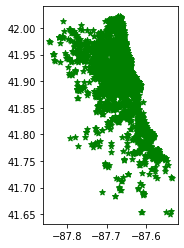

In [ ]:
# Plotting hosung units based coordiantes using Geodataframe
geo_data.plot(marker = "*", color = "green")

In [ ]:
# Importing Chicago Geodata info
n = gpd.read_file("/content/neighbourhoods.geojson")
n

,neighbourhood,neighbourhood_group,geometry
0,Lincoln Square,None,"MULTIPOLYGON (((-87.67441 41.97610, -87.67440 ..."
1,Hyde Park,None,"MULTIPOLYGON (((-87.58038 41.80253, -87.58040 ..."
2,Woodlawn,None,"MULTIPOLYGON (((-87.57715 41.78615, -87.57715 ..."
3,Rogers Park,None,"MULTIPOLYGON (((-87.65456 41.99817, -87.65574 ..."
4,Jefferson Park,None,"MULTIPOLYGON (((-87.75263 41.96797, -87.75279 ..."
...,...,...,...
72,Auburn Gresham,None,"MULTIPOLYGON (((-87.63990 41.75615, -87.63990 ..."
73,Beverly,None,"MULTIPOLYGON (((-87.67308 41.73566, -87.66975 ..."
74,Washington Heights,None,"MULTIPOLYGON (((-87.63373 41.72885, -87.63369 ..."
75,Morgan Park,None,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."


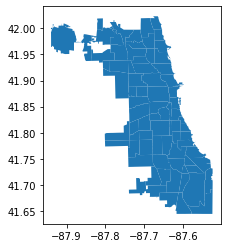

In [ ]:
# Plotting Chicago map
n.plot()

### Top Area with Most Listing


In [ ]:
# Getting total count of listing in each neighbourhood 
top_areas = geo_data["neighbourhood"].value_counts()
top_areas = top_areas.reset_index()
top_areas = top_areas.rename(columns={"neighbourhood":"count", "index": "neighbourhood"})
top_areas

,neighbourhood,count
0,West Town,538
1,Near North Side,465
2,Lake View,455
3,Logan Square,302
4,Near West Side,230
...,...,...
70,West Englewood,1
71,Burnside,1
72,Mount Greenwood,1
73,Montclare,1


In [ ]:
# Merging neighbourhood listing count with neighbourhood geo data
temp = n.merge(top_areas, on='neighbourhood')
temp

,neighbourhood,neighbourhood_group,geometry,count
0,Lincoln Square,None,"MULTIPOLYGON (((-87.67441 41.97610, -87.67440 ...",74
1,Hyde Park,None,"MULTIPOLYGON (((-87.58038 41.80253, -87.58040 ...",79
2,Woodlawn,None,"MULTIPOLYGON (((-87.57715 41.78615, -87.57715 ...",47
3,Rogers Park,None,"MULTIPOLYGON (((-87.65456 41.99817, -87.65574 ...",90
4,Jefferson Park,None,"MULTIPOLYGON (((-87.75263 41.96797, -87.75279 ...",21
...,...,...,...,...
70,Auburn Gresham,None,"MULTIPOLYGON (((-87.63990 41.75615, -87.63990 ...",3
71,Beverly,None,"MULTIPOLYGON (((-87.67308 41.73566, -87.66975 ...",6
72,Washington Heights,None,"MULTIPOLYGON (((-87.63373 41.72885, -87.63369 ...",4
73,Morgan Park,None,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ...",4


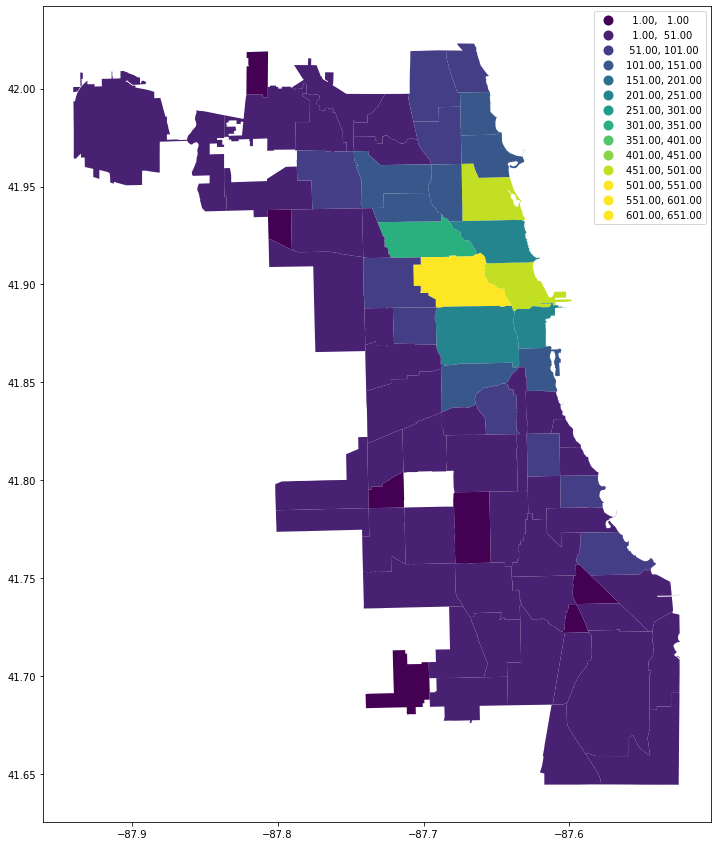

In [ ]:
# Plotting map
# Creating custom bin legend using Map Classify library
temp.plot(column=temp['count'], legend = True, figsize = (15,15), scheme='user_defined',classification_kwds={'bins':[i for i in range(1,700,50)]})

### Neighbourhood Map based on Room Type


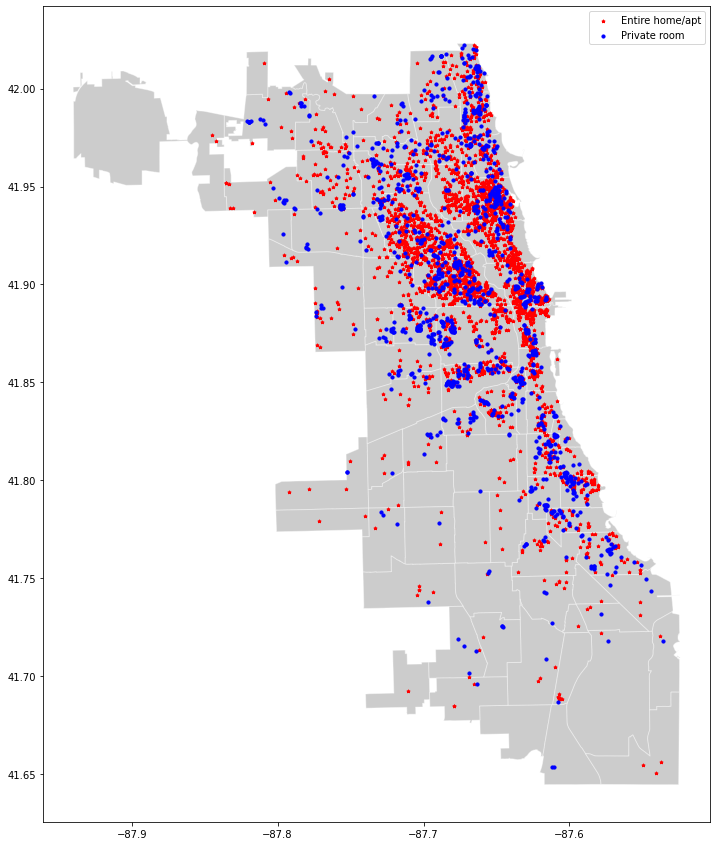

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))

# Plotting Neighbourhood map as base 
n.plot(ax = ax, alpha = 0.4, color = "grey", edgecolor="white")

# Giving different type of room different marker and plotting them above base map
geo_data[geo_data["room_type"] == "Entire home/apt"].plot(ax = ax, color = "red", marker = "*", markersize = 10, label = "Entire home/apt")
geo_data[geo_data["room_type"] == "Private room"].plot(ax = ax, color = "blue", marker = "o", markersize = 10, label = "Private room")
plt.legend()

### Top 10 host based on number of total listing


In [ ]:
# Getting top 10 host based on total listing by host
df = pd.read_csv('listings-2.csv')
df = df[df.neighbourhood == 'Chicago, Illinois, United States']
df = df.drop_duplicates('host_id')
ans = df.nlargest(10,'host_total_listings_count')
ans[["host_id", 'host_name', 'host_total_listings_count']]

,host_id,host_name,host_total_listings_count
4600,194953121,Christian,2844.0
2892,107434423,Blueground,1486.0
2669,121719854,Evolve Vacation Rental,273.0
6191,88566861,Kasa,143.0
1757,12243051,Sonder,131.0
218,3965428,Rob,86.0
3189,22094147,Alexis & Bill,85.0
5104,177489660,Vector Travel,82.0
5211,259688317,Vincent & Sofia,78.0
5778,303169948,Alina,75.0


### Insight 

In [ ]:
data = df["host_neighbourhood"].value_counts()
data = data.reset_index()
data = data.rename(columns={"host_neighbourhood":"total_listing", "index": "neighbourhood"})
data

,neighbourhood,total_listing
0,Logan Square,161
1,Lakeview,143
2,Lincoln Park,98
3,Humboldt Park,78
4,Irving Park,72
...,...,...
135,Pangrati,1
136,Montclare,1
137,Somerville,1
138,Walker's Point,1


In [ ]:
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df["price"] = pd.to_numeric(df["price"])
data['avg_price']= df.groupby('host_neighbourhood')['price'].mean().values
data

,neighbourhood,total_listing,avg_price,average_accommodates
0,Logan Square,161,116.240000,4.480000
1,Lakeview,143,112.142857,3.678571
2,Lincoln Park,98,57.000000,3.333333
3,Humboldt Park,78,35.000000,3.000000
4,Irving Park,72,68.000000,4.000000
...,...,...,...,...
135,Pangrati,1,317.850000,5.125000
136,Montclare,1,164.968254,4.873016
137,Somerville,1,203.323529,4.676471
138,Walker's Point,1,100.080000,4.520000


- Area with most listing has higher average price in comparision to area with lower listing (ignoring for few exceptions) indication those area are most sough after by tourist or other renters i.e Costal areas, hence prices are competitive and high.

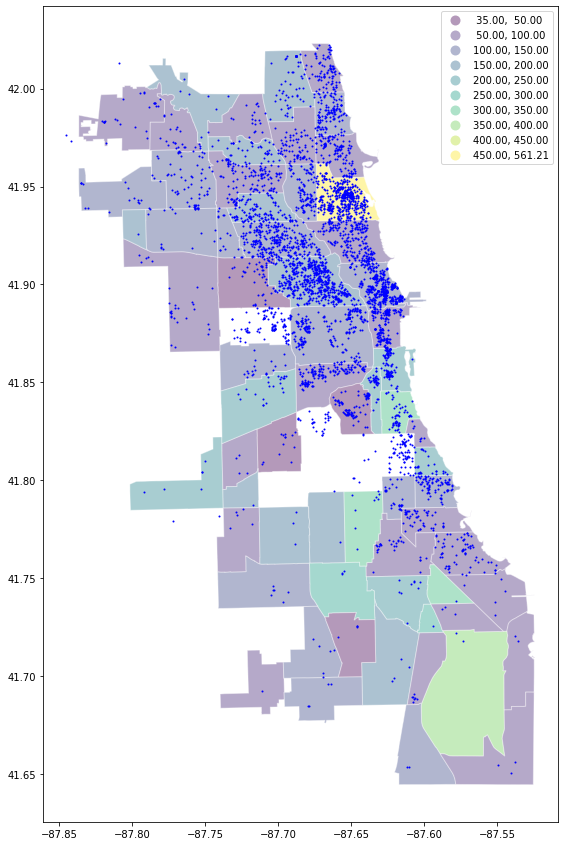

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))

temp = n.merge(data, on='neighbourhood')
temp.plot(ax = ax, alpha = 0.4,column=temp['avg_price'], edgecolor="white", legend = "True", scheme='user_defined',classification_kwds={'bins':[i for i in range(50,500,50)]})
geo_data[geo_data["room_type"] != None].plot(ax = ax, color = "blue", marker = "o", markersize = 1, label = "Private room")
#plt.legend()

In [ ]:
# Average Price set by different host for differnt listing given by them
new = df.groupby('host_name')['price'].mean()
new = new.reset_index()
new['avg_review_scores_rating'] = df.groupby('host_name')['review_scores_rating'].mean().values
new = new.reset_index()
new

,index,host_name,price,avg_review_scores_rating
0,0,(Email hidden by Airbnb),30.0,100.0
1,1,A Tavola,82.0,92.0
2,2,Aaron,165.6,98.0
3,3,Aaron & Molly,80.0,99.0
4,4,Abbey,78.0,97.0
...,...,...,...,...
1465,1465,Zencity,70.0,96.0
1466,1466,Zhe,249.0,96.0
1467,1467,Zhi,49.0,88.0
1468,1468,Zichen,64.0,97.0
